# Iris Classification

## Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [81]:
dataset = pd.read_csv('IRIS.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Encoding the categorical data

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [83]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Splitting the training and test sets

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)

## Binarizing the categorical data

In [85]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_enc = label_binarizer.transform(y_test)

In [86]:
print(label_binarizer.transform([0]))
print(label_binarizer.transform([1]))
print(label_binarizer.transform([2]))

[[1 0 0]]
[[0 1 0]]
[[0 0 1]]


## Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting the Logical regression

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## Fitting the K-nearest neighbours

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Fitting the Support Vector Classifier

In [90]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

## Fitting the Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## Fitting the Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Fitting the Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

# Accuracy Analysis

## Confusion Matrices and Accuracy Score

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)

knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)

svc_pred = svc.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_pred)

nb_pred = nb.predict(X_test)
nb_cm = confusion_matrix(y_test, nb_pred)

dtc_pred = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_pred)

rfc_pred = rfc.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_pred)

In [95]:
print(lr_cm)
accuracy_score(y_test, lr_pred)

[[47  1  0]
 [ 0 37  7]
 [ 0  1 42]]


0.9333333333333333

In [96]:
print(knn_cm)
accuracy_score(y_test, knn_pred)

[[ 2 46  0]
 [ 0 38  6]
 [ 0  2 41]]


0.6

In [97]:
print(svc_cm)
accuracy_score(y_test, svc_pred)

[[47  0  1]
 [ 0 34 10]
 [ 0  3 40]]


0.8962962962962963

In [98]:
print(nb_cm)
accuracy_score(y_test, nb_pred)

[[26 12 10]
 [ 0 40  4]
 [ 0  1 42]]


0.8

In [99]:
print(dtc_cm)
accuracy_score(y_test, dtc_pred)

[[48  0  0]
 [ 0 42  2]
 [ 0  4 39]]


0.9555555555555556

In [100]:
print(rfc_cm)
accuracy_score(y_test, rfc_pred)

[[48  0  0]
 [ 0 40  4]
 [ 0  1 42]]


0.9629629629629629

# Receiver Operating Characteristic

In [101]:
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

## Logistic Regression

In [102]:
y_score = lr.predict_proba(X_test)

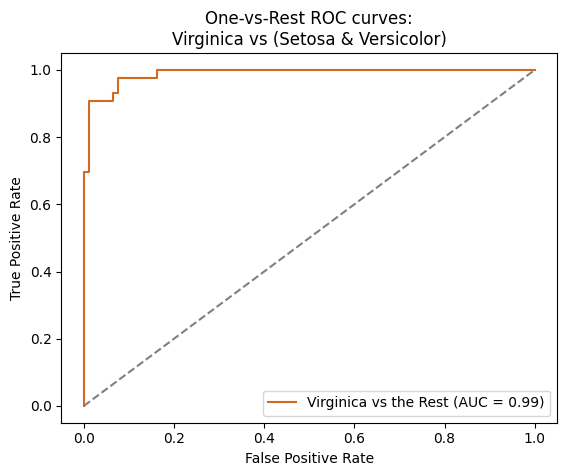

In [103]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    y_enc[:, class_id],
    y_score[:,class_id],
    name = f'Virginica vs the Rest',
    color='chocolate',
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

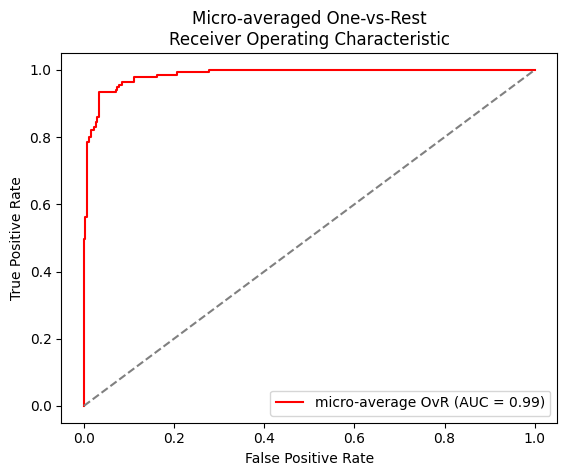

In [104]:
display = RocCurveDisplay.from_predictions(
    y_enc.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="red",
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [105]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99


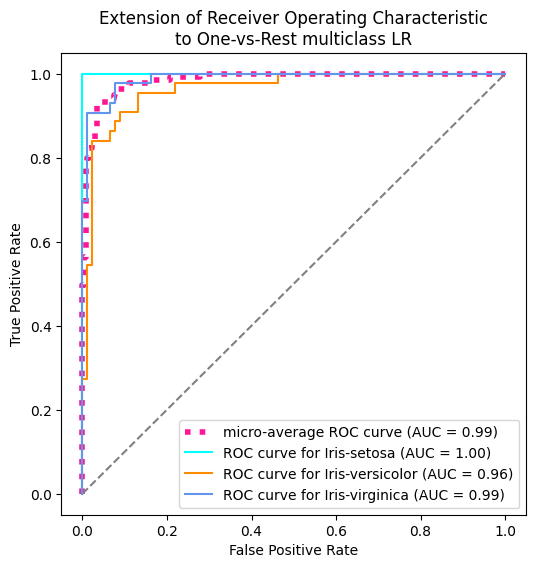

In [106]:
from itertools import cycle
n_classes = len(np.unique(y))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_enc[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass LR",
)

## K-Nearest Neighbors

In [107]:
y_score = knn.predict_proba(X_test)

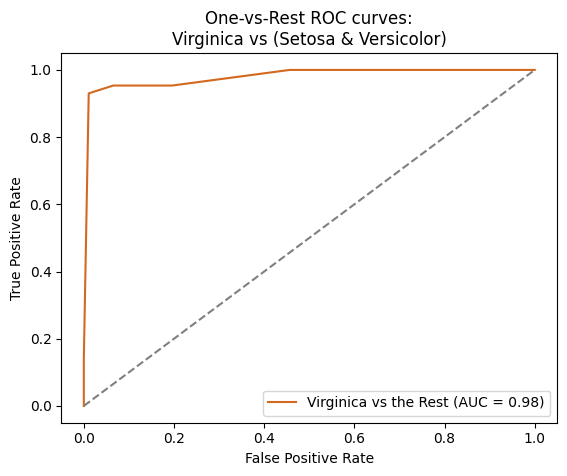

In [108]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    y_enc[:, class_id],
    y_score[:,class_id],
    name = f'Virginica vs the Rest',
    color='chocolate',
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

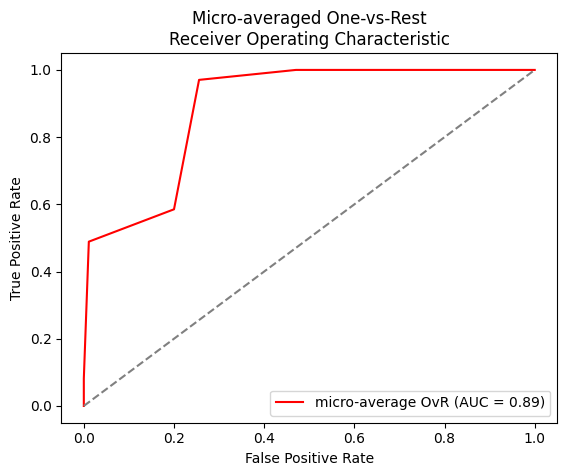

In [109]:
display = RocCurveDisplay.from_predictions(
    y_enc.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="red",
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [110]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.89


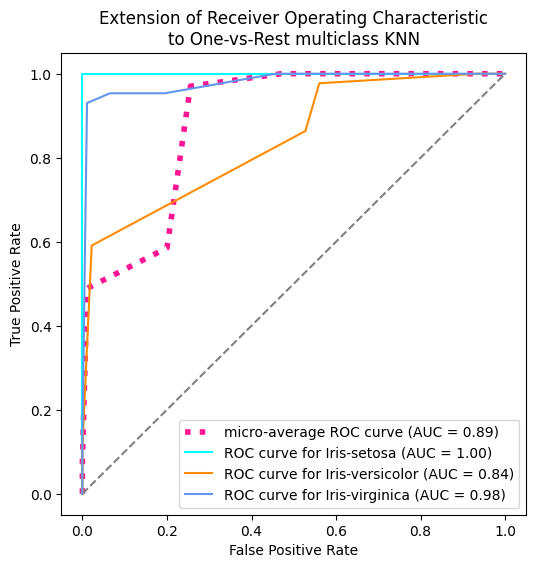

In [111]:
from itertools import cycle
n_classes = len(np.unique(y))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_enc[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass KNN",
)

## Support Vector Classifier

In [112]:
y_score = svc.predict_proba(X_test)

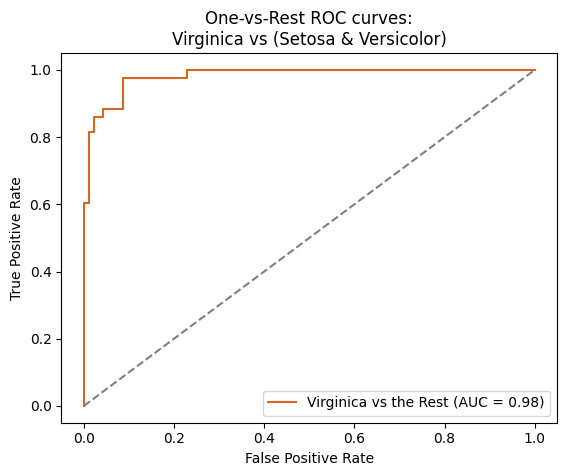

In [113]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    y_enc[:, class_id],
    y_score[:,class_id],
    name = f'Virginica vs the Rest',
    color='chocolate',
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

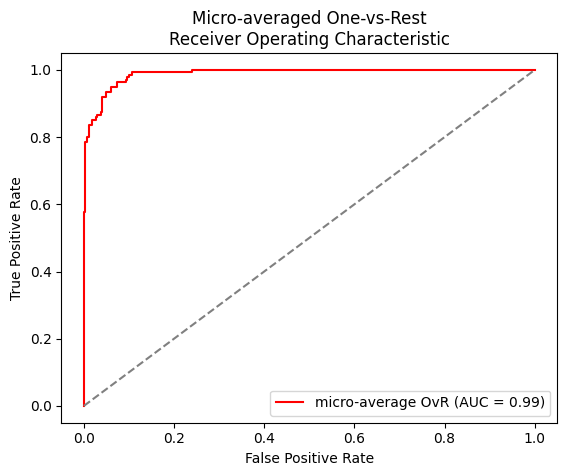

In [114]:
display = RocCurveDisplay.from_predictions(
    y_enc.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="red",
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [115]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99


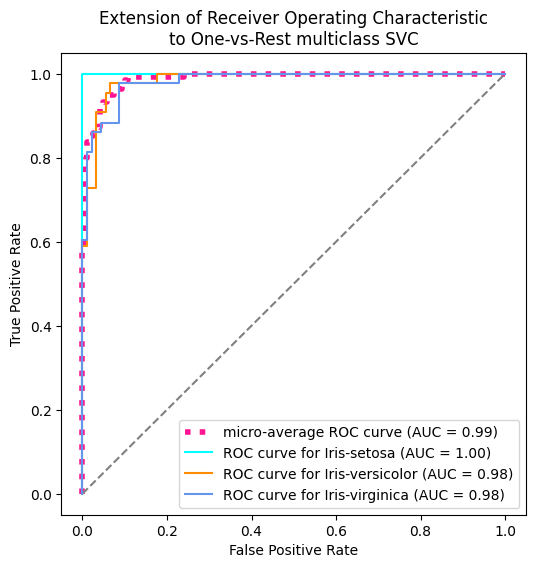

In [116]:
from itertools import cycle
n_classes = len(np.unique(y))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_enc[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass SVC",
)

## Naive Bayes

In [117]:
y_score = nb.predict_proba(X_test)

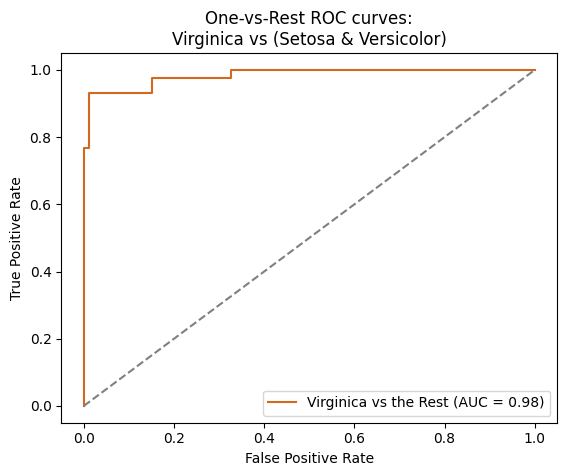

In [118]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    y_enc[:, class_id],
    y_score[:,class_id],
    name = f'Virginica vs the Rest',
    color='chocolate',
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

In [ ]:
display = RocCurveDisplay.from_predictions(
    y_enc.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="red",
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
from itertools import cycle
n_classes = len(np.unique(y))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_enc[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass NB",
)

## Decision Tree Classifier

In [ ]:
y_score = dtc.predict_proba(X_test)

In [ ]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    y_enc[:, class_id],
    y_score[:,class_id],
    name = f'Virginica vs the Rest',
    color='chocolate',
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

In [ ]:
display = RocCurveDisplay.from_predictions(
    y_enc.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="red",
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
from itertools import cycle
n_classes = len(np.unique(y))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_enc[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass DTC",
)

## Random Forest Classifier

In [ ]:
y_score = rfc.predict_proba(X_test)

In [ ]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    y_enc[:, class_id],
    y_score[:,class_id],
    name = f'Virginica vs the Rest',
    color='chocolate',
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

In [ ]:
display = RocCurveDisplay.from_predictions(
    y_enc.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="red",
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic RFC",
)

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
from itertools import cycle
n_classes = len(np.unique(y))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
x_grid = np.arange(0,1.02,0.02)
plt.plot(x_grid, x_grid, color='gray', linestyle='--')

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_enc[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

# Conclusion

Finally we can see that ROC curve of the Support Vector Classifier gives the best result. And furthermore, the *confusion matrix is not helpful* to decide which curve to choose therefore, via ROC we choose **SVC curve for our analysis.**